## 다층 퍼셉트론
1. 입력과 출력 사이에 은닉층이라고 하는 새로운 계층을 추가한 모델.
2. 비선형 문제를 해결할 수 있도록 확장한 모델.
3. 다층 구조를 통해 더 복잡한 패턴을 학습할 수 있음.

## 구성요소:
1. 입력층(Input Layer)
2. 은닉층(Hidden Layer)
3. 출력층(Output Layer)

In [2]:
# Import Package
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Boundary')
    plt.show()

### XOR 게이트
- XOR (Exclusive OR) 게이트는 두 개 이상의 입력을 받아들이고, 입력이 서로 다를 때 출력이 1이 되는 논리 연산을 수행합니다.

In [5]:
# XOR 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [11]:
# MLP 모델 정의
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # 입력층, 노드갯수 4개
model.add(Dense(4, activation='relu'))  # 은닉층, 노드갯수 4개
model.add(Dense(1, activation='sigmoid'))  # 출력층, sigmoid 함수를 이용한 이진 판별
model.compile(loss='binary_crossentropy', # 손실함수는 이진분류입니다.
              optimizer='adam', # 최적화 함수는 아담을 사용합니다.
              metrics=['binary_accuracy']) #정확도로 평가합니다.
model.fit(X, y, epochs=2000, verbose=0)  # 다층 퍼셉트론 학습시키기

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
예측 결과:
 [[0]
 [1]
 [1]
 [0]]
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step


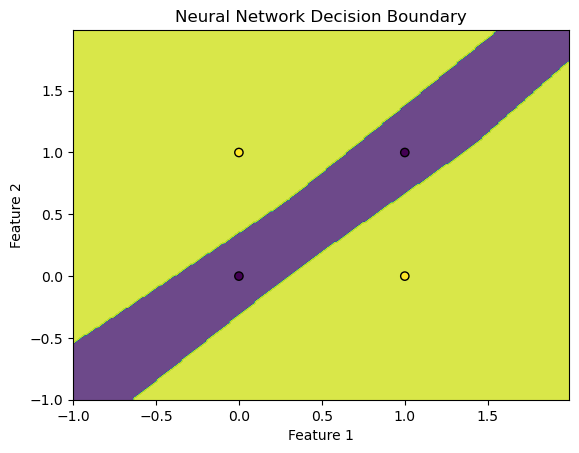

In [12]:
predictions = model.predict(X)  # 예측
predictions = (predictions > 0.5).astype(int)  # 이진 데이터로 변환
print("예측 결과:\n", predictions)

plot_decision_boundary(model, X, y)  # 시각화